In [5]:
import numpy as np 
import pandas as pd 

In [6]:
creds=''

In [7]:
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [8]:
path = Path('/kaggle/input/diabetes-data-set')

In [9]:
df = pd.read_csv(path/'diabetes.csv')

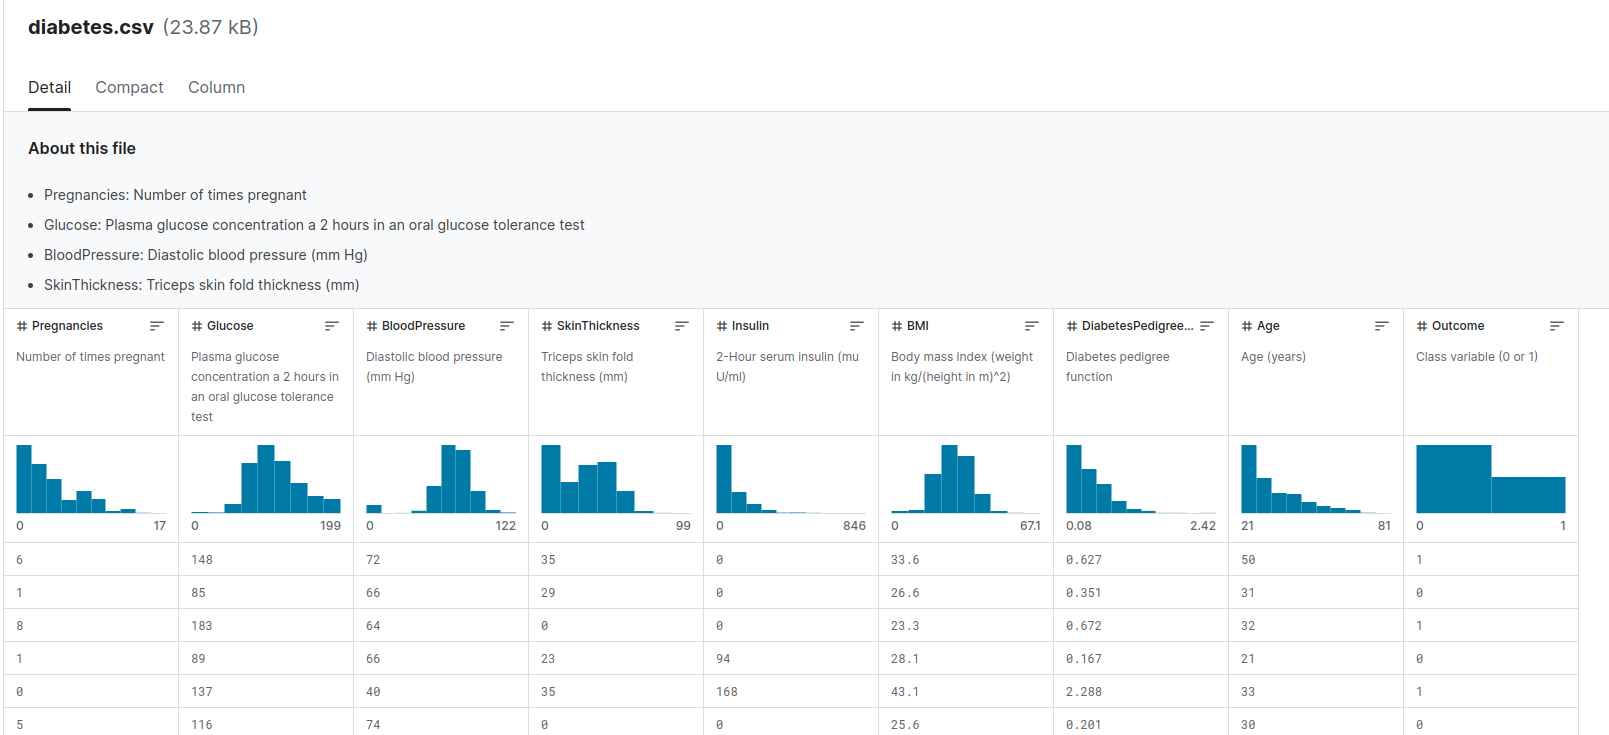

In [10]:
df.shape

(768, 9)

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [18]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
#df['Colum'] = df['Colum'].replace({'Male': 0, 'Female': 1})

In [20]:
#df['Country'] = df['Country'].replace({'USA': 0, 'China': 1, 'Australia':2 ,'UK': 3, 'Canada':4})

In [21]:
#df['Salary'] = df['Salary']/12.000000

# Linear Model

In [22]:
import torch
from torch import tensor

t_dep = tensor(df.Outcome)

In [23]:
indep_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[  6.0000, 148.0000,  72.0000,  ...,  33.6000,   0.6270,  50.0000],
        [  1.0000,  85.0000,  66.0000,  ...,  26.6000,   0.3510,  31.0000],
        [  8.0000, 183.0000,  64.0000,  ...,  23.3000,   0.6720,  32.0000],
        ...,
        [  5.0000, 121.0000,  72.0000,  ...,  26.2000,   0.2450,  30.0000],
        [  1.0000, 126.0000,  60.0000,  ...,  30.1000,   0.3490,  47.0000],
        [  1.0000,  93.0000,  70.0000,  ...,  30.4000,   0.3150,  23.0000]])

In [24]:
t_indep.shape

torch.Size([768, 8])

In [25]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136])

In [26]:
t_indep*coeffs

tensor([[ -2.7774,  20.5097,  17.3449,  ..., -10.5744,   0.3057,  15.6784],
        [ -0.4629,  11.7792,  15.8995,  ...,  -8.3714,   0.1712,   9.7206],
        [ -3.7032,  25.3600,  15.4177,  ...,  -7.3329,   0.3277,  10.0342],
        ...,
        [ -2.3145,  16.7681,  17.3449,  ...,  -8.2455,   0.1195,   9.4071],
        [ -0.4629,  17.4610,  14.4540,  ...,  -9.4729,   0.1702,  14.7377],
        [ -0.4629,  12.8879,  16.8631,  ...,  -9.5674,   0.1536,   7.2121]])

In [27]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [28]:
t_indep*coeffs

tensor([[-0.1634,  0.1031,  0.1422,  ..., -0.1576,  0.1263,  0.1936],
        [-0.0272,  0.0592,  0.1303,  ..., -0.1248,  0.0707,  0.1200],
        [-0.2178,  0.1274,  0.1264,  ..., -0.1093,  0.1354,  0.1239],
        ...,
        [-0.1361,  0.0843,  0.1422,  ..., -0.1229,  0.0494,  0.1161],
        [-0.0272,  0.0877,  0.1185,  ..., -0.1412,  0.0703,  0.1819],
        [-0.0272,  0.0648,  0.1382,  ..., -0.1426,  0.0635,  0.0890]])

In [29]:
preds = (t_indep*coeffs).sum(axis=1)

In [30]:
preds[:10]

tensor([ 0.1642,  0.1620,  0.1860,  0.0664,  0.4288,  0.1273, -0.0239, -0.2185,
         0.0431,  0.3146])

In [31]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.3965)

In [32]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [33]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136],
       requires_grad=True)

In [34]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.3965, grad_fn=<MeanBackward0>)

In [35]:
loss.backward()

In [36]:
coeffs.grad

tensor([-0.0414,  0.0216,  0.0716,  0.0034, -0.0117,  0.0275,  0.0170,  0.0199])

In [37]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.0829,  0.0432,  0.1432,  0.0069, -0.0234,  0.0550,  0.0340,  0.0398])

In [38]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.0777)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.3948)


In [42]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [43]:
val_split

(#153) [102,35,552,457,234,617,502,601,678,44...]

In [44]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(615, 153)

In [45]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [46]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [47]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [48]:
def train_model(epochs=30, lr=0.0777):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [49]:
coeffs = train_model(18, lr=0.6)

0.392; 0.389; 0.391; 0.391; 0.400; 0.383; 0.392; 0.383; 0.403; 0.371; 0.371; 0.383; 0.418; 0.374; 0.389; 0.438; 0.394; 0.359; 

In [50]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Pregnancies': tensor(-0.1220),
 'Glucose': tensor(0.2522),
 'BloodPressure': tensor(-0.0923),
 'SkinThickness': tensor(-0.0671),
 'Insulin': tensor(-0.1200),
 'BMI': tensor(-0.2353),
 'DiabetesPedigreeFunction': tensor(0.4106),
 'Age': tensor(0.2324)}

In [51]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)
# Acurracy

tensor(0.6275)

# Using Sigmoid

In [52]:
preds = calc_preds(coeffs,val_indep)

In [53]:
preds[:20]

tensor([ 0.1116,  0.1813,  0.1687,  0.0174,  0.0070,  0.0531, -0.0180,  0.1081,
         0.0596,  0.1715,  0.1725,  0.0168,  0.0340,  0.1192,  0.1399,  0.0454,
         0.1874,  0.0462,  0.1159,  0.1253])

In [54]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [55]:
coeffs = train_model(lr=6)

0.510; 0.483; 0.456; 0.433; 0.415; 0.402; 0.392; 0.384; 0.379; 0.374; 0.371; 0.368; 0.366; 0.364; 0.362; 0.361; 0.360; 0.359; 0.358; 0.357; 0.356; 0.356; 0.355; 0.355; 0.354; 0.354; 0.353; 0.353; 0.352; 0.352; 

In [56]:
acc(coeffs)

tensor(0.6275)

In [57]:
show_coeffs()

{'Pregnancies': tensor(-1.0226),
 'Glucose': tensor(-1.9373),
 'BloodPressure': tensor(-2.3137),
 'SkinThickness': tensor(-1.0366),
 'Insulin': tensor(-0.5101),
 'BMI': tensor(-2.1096),
 'DiabetesPedigreeFunction': tensor(-0.1883),
 'Age': tensor(-1.2678)}

# Using matrix product

In [58]:
val_indep@coeffs

tensor([-4.0940, -4.1887, -5.0658, -4.1170, -3.8273, -3.1152, -4.0042, -2.4936,
        -3.8776, -4.6931, -1.3171, -3.7009, -3.9469, -5.3698, -4.5932, -3.9215,
        -5.0690, -4.1346, -3.2269, -4.8584, -5.3238, -2.9096, -5.0602, -5.2417,
        -2.4231, -4.3048, -5.5846, -5.8973, -5.6897, -4.5176, -4.2412, -5.4214,
        -4.1633, -5.3345, -5.7549, -4.1902, -5.2795, -4.0631, -5.8280, -4.2248,
        -3.2011, -3.3987, -5.3236, -3.8526, -3.6152, -4.4099, -4.1060, -3.8555,
        -3.5336, -4.5207, -4.2887, -4.9065, -5.4925, -5.3684, -5.9675, -4.7174,
        -5.8611, -4.6489, -3.9469, -3.5321, -4.4525, -3.4599, -4.2387, -4.9811,
        -1.8426, -4.8501, -4.9212, -4.9239, -5.0042, -4.9647, -4.9283, -5.2587,
        -4.1906, -4.2838, -5.6177, -4.0793, -3.6533, -4.3273, -5.4871, -4.5218,
        -4.7215, -4.3785, -5.5909, -4.1298, -5.3373, -4.8740, -3.4255, -4.6195,
        -4.3519, -2.3116, -2.9435, -2.9781, -5.9641, -3.7222, -4.6018, -4.3910,
        -5.4091, -3.6308, -4.4795, -3.62

In [59]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [60]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [61]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [62]:
coeffs = train_model(lr=6)

0.509; 0.482; 0.456; 0.433; 0.415; 0.401; 0.392; 0.384; 0.379; 0.374; 0.371; 0.368; 0.366; 0.364; 0.362; 0.361; 0.360; 0.359; 0.358; 0.357; 0.356; 0.356; 0.355; 0.354; 0.354; 0.353; 0.353; 0.353; 0.352; 0.352; 

In [63]:
acc(coeffs)

tensor(0.6275)

# Neural Network

In [121]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.7
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [122]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [123]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [124]:
coeffs = train_model(lr=2)

0.561; 0.539; 0.504; 0.460; 0.421; 0.394; 0.378; 0.368; 0.362; 0.358; 0.355; 0.354; 0.352; 0.351; 0.350; 0.350; 0.349; 0.348; 0.348; 0.348; 0.347; 0.347; 0.347; 0.347; 0.346; 0.346; 0.346; 0.346; 0.346; 0.346; 

In [68]:
acc(coeffs)

tensor(0.6275)

# Deep Learning

In [135]:
def init_coeffs():
    hiddens = [10, 10]
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [136]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [137]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [138]:
coeffs = train_model(lr=6)

0.546; 0.465; 0.434; 0.411; 0.396; 0.385; 0.378; 0.372; 0.368; 0.365; 0.363; 0.361; 0.359; 0.358; 0.357; 0.356; 0.355; 0.354; 0.354; 0.353; 0.352; 0.352; 0.351; 0.351; 0.351; 0.350; 0.350; 0.350; 0.350; 0.349; 

In [139]:
acc(coeffs)

tensor(0.6275)

In [140]:
torch.save(coeffs, 'Dianetes_Neural_Network.pkl')

In [141]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [142]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(615, 153)

In [143]:
val_indep

tensor([[0.0000, 0.6281, 0.7869,  ..., 0.3353, 0.1083, 0.2593],
        [0.2353, 0.5176, 0.4918,  ..., 0.3577, 0.3992, 0.4074],
        [0.3529, 0.5729, 0.7213,  ..., 0.4143, 0.1021, 0.8148],
        ...,
        [0.8235, 0.5025, 0.6393,  ..., 0.5455, 0.1702, 0.5679],
        [0.4706, 0.5025, 0.6230,  ..., 0.5768, 0.0785, 0.5185],
        [0.0588, 0.6583, 0.5246,  ..., 0.3532, 0.1607, 0.2593]])

In [144]:
prediction = calc_preds(coeffs,val_indep)

In [145]:
prediction[:10]

tensor([[0.0192],
        [0.0192],
        [0.0192],
        [0.0192],
        [0.0192],
        [0.0192],
        [0.0192],
        [0.0192],
        [0.0192],
        [0.0192]], grad_fn=<SliceBackward0>)

In [146]:
def acc2(coeffs): return (val_dep.bool()==(prediction>0.1)).float().mean()
acc2(coeffs)

tensor(0.6275)

# Trying to get the best learning rate


In [131]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.tabular.all import *

In [132]:
!pip install fastai --upgrade

In [133]:
splits = RandomSplitter(seed=42)(df)

In [162]:
dls = TabularPandas(
    df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cont_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','DiabetesPedigreeFunction','BMI'],
    y_names="Outcome", y_block = CategoryBlock(),
).dataloaders(path=".")

In [189]:
learn1= tabular_learner(dls,metrics = accuracy, layers = [10,10])

SuggestedLRs(slide=0.17378008365631104, valley=0.007585775572806597)

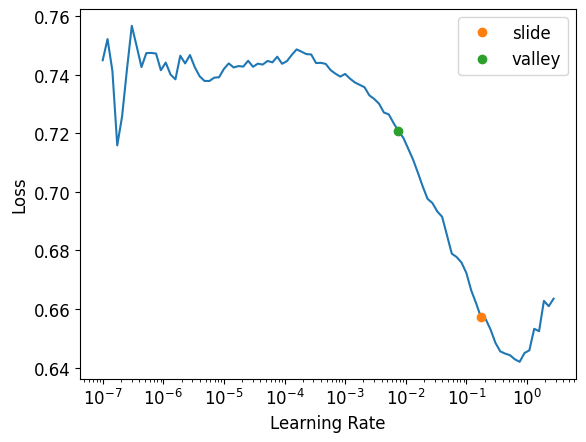

In [171]:
learn1.lr_find(suggest_funcs=(slide,valley))

# Using Fastai to see the Diference

In [165]:
dls.show_batch()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,DiabetesPedigreeFunction,BMI,Outcome
0,3.000000e+00,129.000000,6.400000e+01,2.900000e+01,1.150000e+02,28.0,0.219,26.400000,1
1,7.000000e+00,83.000000,7.800000e+01,2.600000e+01,7.100000e+01,36.0,0.767,29.299999,0
2,1.000000e+00,153.000001,8.200000e+01,4.200000e+01,4.850000e+02,23.0,0.687,40.599998,0
3,6.000000e+00,129.000000,9.000000e+01,7.000000e+00,3.260000e+02,60.0,0.582,19.600000,0
4,3.000000e+00,162.000001,5.200000e+01,3.800000e+01,-7.875215e-07,24.0,0.652,37.200001,1
5,5.159882e-08,162.000001,7.600000e+01,5.600000e+01,1.000000e+02,25.0,0.759,53.200002,1
6,1.000000e+00,144.000000,8.200000e+01,4.000000e+01,-7.875215e-07,28.0,0.607,41.299999,0
7,4.000000e+00,142.000000,8.600000e+01,1.383759e-07,-7.875215e-07,22.0,0.645,44.000000,1
8,4.000000e+00,99.000000,7.200000e+01,1.700000e+01,-7.875215e-07,28.0,0.294,25.600001,0
9,5.159882e-08,145.000000,-4.599023e-07,1.383759e-07,-7.875215e-07,31.0,0.630,44.200001,1


In [157]:
??tabular_learner

Signature:
tabular_learner(
    dls: 'TabularDataLoaders',
    layers: 'list' = None,
    emb_szs: 'list' = None,
    config: 'dict' = None,
    n_out: 'int' = None,
    y_range: 'Tuple' = None,
    *,
    loss_func: 'callable | None' = None,
    opt_func: 'Optimizer | OptimWrapper' = <function Adam at 0x78cd35cb5a20>,
    lr: 'float | slice' = 0.001,
    splitter: 'callable' = <function trainable_params at 0x78cd34eb7a30>,
    cbs: 'Callback | MutableSequence | None' = None,
    metrics: 'callable | MutableSequence | None' = None,
    path: 'str | Path | None' = None,
    model_dir: 'str | Path' = 'models',
    wd: 'float | int | None' = None,
    wd_bn_bias: 'bool' = False,
    train_bn: 'bool' = True,
    moms: 'tuple' = (0.95, 0.85, 0.95),
    default_cbs: 'bool' = True,
)
Source:   
@delegates(Learner.__init__)
def tabular_learner(
        dls:TabularDataLoaders,
        layers:list=None, # Size of the layers generated by `LinBnDrop`
        emb_szs:list=None, # Tuples of `n_uniqu

In [190]:
learn = tabular_learner(dls, metrics=[F1Score(),accuracy])
learn.fit(10)

epoch,train_loss,valid_loss,f1_score,accuracy,time
0,0.648106,0.604030,0.703448,0.718954,00:00
1,0.574331,0.569024,0.672000,0.732026,00:00
2,0.535978,0.563578,0.655462,0.732026,00:00
3,0.514336,0.555059,0.694915,0.764706,00:00
4,0.493658,0.550815,0.722689,0.784314,00:00
5,0.478593,0.538834,0.741379,0.803922,00:00
6,0.462687,0.539647,0.728814,0.790850,00:00
7,0.448210,0.540076,0.735043,0.797386,00:00
8,0.435888,0.540774,0.747826,0.810458,00:00
9,0.423125,0.539042,0.701754,0.777778,00:00


In [178]:
learn.show_results()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,DiabetesPedigreeFunction,BMI,Outcome,Outcome_pred
0,0.050387,0.738341,-0.575306,0.463508,0.555186,0.305236,-0.547880,-0.304224,0.0,1.0
1,1.821121,0.253800,-0.369988,0.967812,-0.691074,0.389189,-0.078519,1.176461,1.0,1.0
2,0.640632,-0.586071,-0.164671,-1.301554,-0.691074,-0.366392,-0.663696,-0.962307,0.0,0.0
3,0.050387,-0.941402,0.553939,-1.301554,-0.691074,-0.366392,-0.700270,1.303015,0.0,0.0
4,2.411366,0.964460,0.040646,1.219963,1.721330,0.389189,0.838868,1.252393,1.0,1.0
5,-0.539858,-0.489163,-0.677964,0.400470,0.777733,-0.954067,-0.124236,-0.367501,0.0,0.0
6,0.050387,-0.586071,-0.472647,0.778698,1.018083,-0.030578,1.521575,-1.000273,0.0,0.0
7,-1.130103,-0.682980,0.964574,2.480722,0.288131,-0.198485,1.509384,1.885165,0.0,0.0
8,-0.244736,-1.522851,-0.062012,0.463508,-0.290490,-0.870113,-0.529593,-0.278913,0.0,0.0


In [179]:
learn.summary()0.777778

TabularModel (Input shape: 64 x 0)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 8              
BatchNorm1d                               16         True      
____________________________________________________________________________
                     64 x 200            
Linear                                    1600       True      
ReLU                                                           
BatchNorm1d                               400        True      
____________________________________________________________________________
                     64 x 100            
Linear                                    20000      True      
ReLU                                                           
BatchNorm1d                               200        True      
____________________________________________________________________________
                     64 x 2              
Linear                                    202        T

# Deploy in HuggingFace

In [183]:
https://huggingface.co/spaces/fastaioncampus/DiabetesDiagnosis